ORANGE JUICE SALES ANALYSIS - EDA - GITHUB - Q3 - APPLIED MATERIALS - ANALYSIS BY TANMAY GHOSH
#### Datasets : Sales.csv, storedemo.csv

In [2]:
# IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATAFRAME 1 - SALES DATA
##### Units sold = exponential log of logmove column

In [3]:
data_sales = pd.read_csv('sales.csv')
data_sales['Units_sold'] = round(np.exp(data_sales['logmove']),0)
data_sales = data_sales.iloc[:,1:]
data_sales.dropna(inplace=True)
data_sales.isna().sum()
data_sales.head()

,store,brand,week,logmove,constant,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,deal,feat,profit,Units_sold
0,2,1,40,9.018695,1,0.060469,0.060497,0.042031,0.029531,0.049531,0.053021,0.038906,0.041406,0.028906,0.024844,0.038984,1,0.0,37.992326,8256.0
1,2,1,46,8.723231,1,0.060469,0.060312,0.045156,0.046719,0.049531,0.047813,0.045781,0.027969,0.042969,0.042031,0.038984,0,0.0,30.126667,6144.0
2,2,1,47,8.253228,1,0.060469,0.060312,0.045156,0.046719,0.037344,0.053021,0.045781,0.041406,0.048125,0.032656,0.038984,0,0.0,30.000000,3840.0
3,2,1,48,8.987197,1,0.060469,0.060312,0.049844,0.037344,0.049531,0.053021,0.045781,0.041406,0.042344,0.032656,0.038984,0,0.0,29.950000,8000.0
4,2,1,50,9.093357,1,0.060469,0.060312,0.043594,0.031094,0.049531,0.053021,0.046648,0.041406,0.042344,0.032656,0.038203,0,0.0,29.920000,8896.0


#### Grouping the data on store level, and averaging all prices

In [4]:
grouped_on_store = data_sales.groupby(['store']).mean().reset_index()
group_set = grouped_on_store[['store','price1','price2','price3','price4','price5','price6',
                            'price7','price8','price9','price10','price11','profit','Units_sold']]
group_set.head()

,store,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,profit,Units_sold
0,2,0.046303,0.051159,0.045672,0.036527,0.036280,0.044283,0.038117,0.035442,0.033469,0.027989,0.030892,31.080161,7669.236364
1,5,0.045637,0.049785,0.044927,0.036223,0.035644,0.042774,0.036837,0.034797,0.032104,0.027089,0.028106,28.597027,8905.554859
2,8,0.043016,0.044861,0.043537,0.033643,0.033309,0.038724,0.034083,0.031590,0.031692,0.026005,0.027002,24.133076,13290.724191
3,9,0.043798,0.048161,0.045303,0.035211,0.034611,0.041640,0.036043,0.033888,0.031579,0.026599,0.028101,27.154972,9321.821290
4,12,0.047480,0.051793,0.045744,0.037805,0.036860,0.044676,0.038571,0.035811,0.034842,0.028779,0.028882,30.837382,13044.515415


#### Metadata Data 1 - Sales.csv

In [5]:
group_set.shape
group_set.head()
group_set.isnull().sum()
group_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   store       83 non-null     int64  
 1   price1      83 non-null     float64
 2   price2      83 non-null     float64
 3   price3      83 non-null     float64
 4   price4      83 non-null     float64
 5   price5      83 non-null     float64
 6   price6      83 non-null     float64
 7   price7      83 non-null     float64
 8   price8      83 non-null     float64
 9   price9      83 non-null     float64
 10  price10     83 non-null     float64
 11  price11     83 non-null     float64
 12  profit      83 non-null     float64
 13  Units_sold  83 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 9.2 KB


In [6]:
group_set = group_set.drop_duplicates(keep='first')
group_set.duplicated().sum()
group_set.head()

,store,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,profit,Units_sold
0,2,0.046303,0.051159,0.045672,0.036527,0.036280,0.044283,0.038117,0.035442,0.033469,0.027989,0.030892,31.080161,7669.236364
1,5,0.045637,0.049785,0.044927,0.036223,0.035644,0.042774,0.036837,0.034797,0.032104,0.027089,0.028106,28.597027,8905.554859
2,8,0.043016,0.044861,0.043537,0.033643,0.033309,0.038724,0.034083,0.031590,0.031692,0.026005,0.027002,24.133076,13290.724191
3,9,0.043798,0.048161,0.045303,0.035211,0.034611,0.041640,0.036043,0.033888,0.031579,0.026599,0.028101,27.154972,9321.821290
4,12,0.047480,0.051793,0.045744,0.037805,0.036860,0.044676,0.038571,0.035811,0.034842,0.028779,0.028882,30.837382,13044.515415


#### Grpuping the data on Units sold
##### Units sold = exponential component of the logmove column

   store    price1    price2    price3    price4    price5    price6  \
0      2  0.046303  0.051159  0.045672  0.036527  0.036280  0.044283   
1      5  0.045637  0.049785  0.044927  0.036223  0.035644  0.042774   
2      8  0.043016  0.044861  0.043537  0.033643  0.033309  0.038724   
3      9  0.043798  0.048161  0.045303  0.035211  0.034611  0.041640   
4     12  0.047480  0.051793  0.045744  0.037805  0.036860  0.044676   

     price7    price8    price9   price10   price11     profit    Units_sold  \
0  0.038117  0.035442  0.033469  0.027989  0.030892  31.080161   7669.236364   
1  0.036837  0.034797  0.032104  0.027089  0.028106  28.597027   8905.554859   
2  0.034083  0.031590  0.031692  0.026005  0.027002  24.133076  13290.724191   
3  0.036043  0.033888  0.031579  0.026599  0.028101  27.154972   9321.821290   
4  0.038571  0.035811  0.034842  0.028779  0.028882  30.837382  13044.515415   

   profit_per_store  
0         238361.10  
1         254672.39  
2         320746.06 

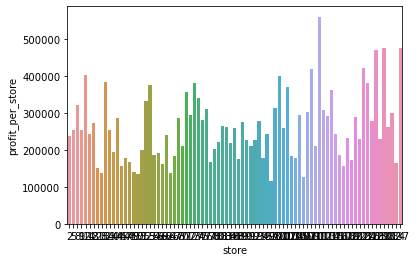

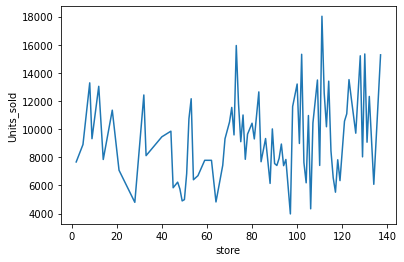

In [7]:
# profit per week

group_set['profit_per_store'] = round(group_set['Units_sold'] * group_set['profit'],2)
print(group_set.head())

figsize=(30, 5)

sns.barplot(x='store', y='profit_per_store', data=group_set)
plt.show()
figsize=(30, 5)
sns.lineplot(x='store', y='Units_sold', data=group_set)
plt.show()


In [8]:
view_data = group_set[['store','profit_per_store','Units_sold']]
view_data['profit_per_store'] = view_data['profit_per_store'].round(2).astype(str) + ' $'
view_data['Units_sold'] = view_data['Units_sold'].round(0)
view_data.sort_values('Units_sold', ascending=True)
view_data.head()

,store,profit_per_store,Units_sold
0,2,238361.1 $,7669.0
1,5,254672.39 $,8906.0
2,8,320746.06 $,13291.0
3,9,253133.79 $,9322.0
4,12,402258.7 $,13045.0


#### Calculating and plotting sum of profit per store

In [9]:
# checking if any store has 0 revenue or profit
Revenue_0 = view_data[view_data['profit_per_store'] == 0]
Revenue_0

,store,profit_per_store,Units_sold


##### Condition to check profitability
##### First lets check the descriptives about the data
##### Profit_per_store has maximum value - 561291
##### minimum value - 114860
##### logic - from min value to 25 % (185619) or more range - low profit
##### logic - from 25% to 50 % - 253133  or more range - moderate profit
##### logic - from 50 % to 75 % - 305471 or more range - high profit
##### logic from 75 % to max (561291) or more range - very high profit

In [10]:
# grouping dataset to enumerate rules for profitability categorization
viz_data = group_set[['store','profit_per_store','Units_sold']]
viz_data.describe().round(2)


,store,profit_per_store,Units_sold
count,83.00,83.00,83.00
mean,80.93,261946.91,9414.66
std,35.93,92455.83,3030.88
min,2.00,114860.88,3977.21
25%,53.50,185619.28,7420.60
50%,86.00,253133.79,9108.36
75%,110.50,305471.00,11446.67
max,137.00,561291.85,18023.68


In [38]:
# Profit Categorization
Store_Category = []
for i in tqdm(range(viz_data.shape[0])):
    if 185600 < viz_data['profit_per_store'][i] <= 303100 :
        res = 'Moderate Profit Store'
    elif 303100 < viz_data['profit_per_store'][i] <= 405400 :
        res = 'High Profit Store'
    elif 405400 < viz_data['profit_per_store'][i]:
        res = 'Very High Profit Store'
    else :
        res = 'Very Low profit Store'
    Store_Category.append(res)
viz_data['Store_Category'] = Store_Category
viz_data.sort_values('Store_Category')
viz_data.head(10)


100%|██████████| 83/83 [00:00<00:00, 41582.33it/s]


,store,profit_per_store,Units_sold,Store_Category,Sale_Category
0,2,238361.10,7669.236364,Moderate Profit Store,Low Sales
1,5,254672.39,8905.554859,Moderate Profit Store,Moderate Sales
2,8,320746.06,13290.724191,High Profit Store,High Sales
3,9,253133.79,9321.821290,Moderate Profit Store,Moderate Sales
4,12,402258.70,13044.515415,High Profit Store,High Sales
5,14,242533.14,7844.724165,Moderate Profit Store,Low Sales
6,18,272298.97,11349.584416,Moderate Profit Store,Moderate Sales
7,21,152372.33,7079.321212,Very Low profit Store,Low Sales
8,28,138835.29,4801.466977,Very Low profit Store,Very High Sales
9,32,383230.53,12429.478788,High Profit Store,High Sales


In [36]:
# Sale category

Sale_Category = []

for i in tqdm(range(viz_data.shape[0])):
    if 5000 < viz_data['Units_sold'][i] <= 8500:
        res = 'Low Sales'
    elif 8500 < viz_data['Units_sold'][i] <=12000:
        res = 'Moderate Sales'
    elif 12000 < viz_data['Units_sold'][i] <=16440:
        res = 'High Sales'
    else :
        res = 'Very High Sales'
    Sale_Category.append(res)
viz_data['Sale_Category'] = Sale_Category
viz_data.head()


100%|██████████| 83/83 [00:00<00:00, 41597.23it/s]


,store,profit_per_store,Units_sold,Store_Category,Sale_Category
0,2,238361.10,7669.236364,Moderate Profit Store,Low Sales
1,5,254672.39,8905.554859,Moderate Profit Store,Moderate Sales
2,8,320746.06,13290.724191,High Profit Store,High Sales
3,9,253133.79,9321.821290,Moderate Profit Store,Moderate Sales
4,12,402258.70,13044.515415,High Profit Store,High Sales


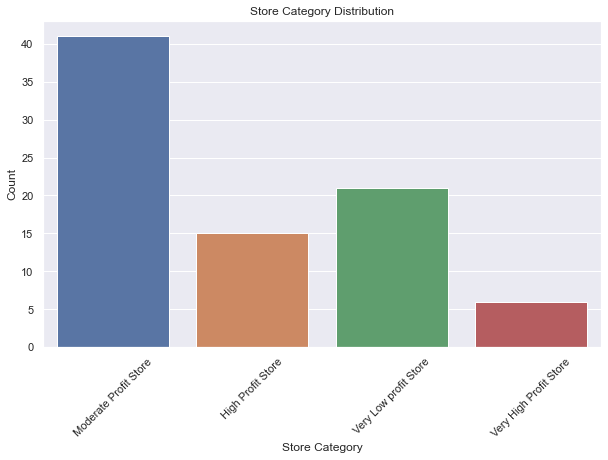

In [39]:
# Analyzing store performance by Profit Category
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=viz_data, x='Store_Category')
plt.title('Store Category Distribution')
plt.xlabel('Store Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [40]:
# grouping the viz data on profitability

viz_data_grouped = viz_data.groupby('Sale_Category')['Units_sold',
'profit_per_store'].sum().reset_index().round(2)
viz_data_grouped.rename(columns={'profit_per_store': 'Total Profit', 'Units_sold':'Total Sales Units'}, inplace=True)
viz_data_grouped['Total Profit'] = viz_data_grouped['Total Profit'].round(0).astype(str) + ' $'
viz_data_grouped['Total Sales Units'] = viz_data_grouped['Total Sales Units'].round(0).astype(str) + ' $'
viz_data_grouped.head(10)

,Sale_Category,Total Sales Units,Total Profit
0,High Sales,231412.0 $,6513214.0 $
1,Low Sales,221360.0 $,6165559.0 $
2,Moderate Sales,282780.0 $,7710455.0 $
3,Very High Sales,45865.0 $,1352365.0 $


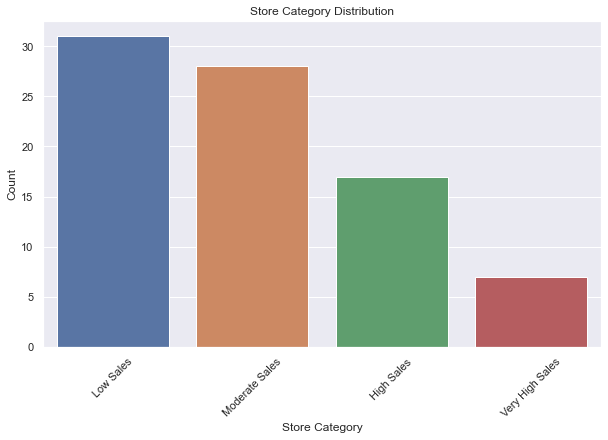

In [41]:
# Analyzing store performance by Sale Category
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=viz_data, x='Sale_Category')
plt.title('Store Category Distribution')
plt.xlabel('Store Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

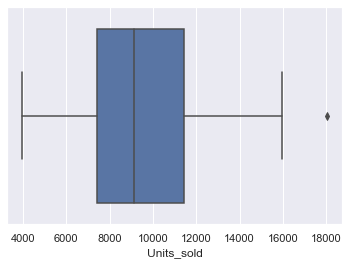

In [42]:
# Box plots for outliers
sales_plot = sns.boxplot(viz_data['Units_sold'])

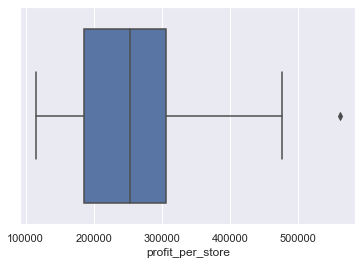

In [43]:
profit_plot = sns.boxplot(viz_data['profit_per_store'])

### Correlation matrix between several price ranges of the same product

 ###### most correlation between units sold and price 10, which means more units are sold at that price
 ###### Price 11 provides most profit and is least famous 
###### price 4 is least famous, however it is not the most profitable and also not the least profitable as expected
###### price 6 is negatively correlated less than price 4, however price 6 is the least profitable

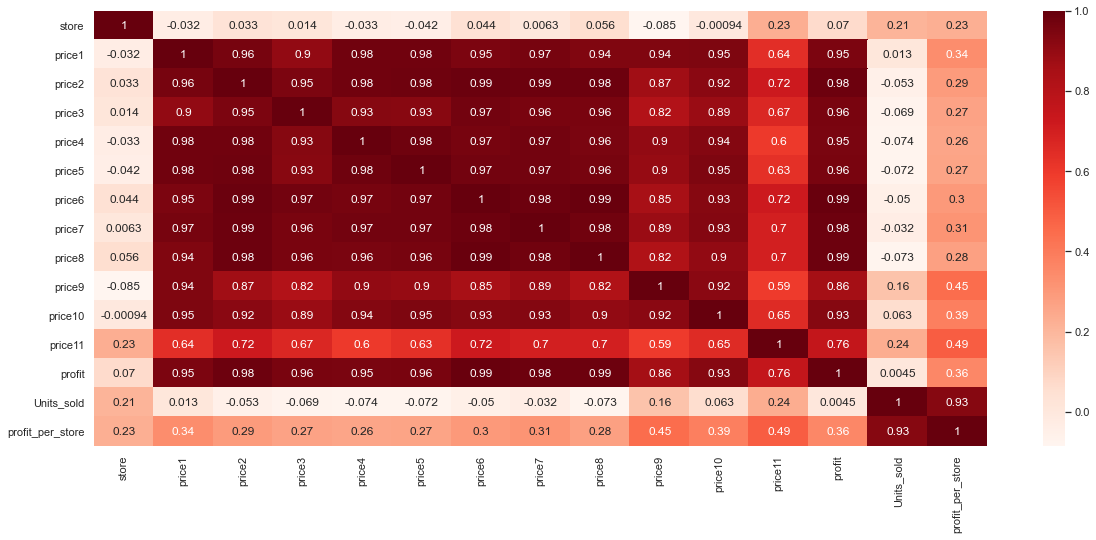

In [45]:
plt.figure(figsize=(20,8))
sns.heatmap(group_set.corr(), annot=True, cmap = 'Reds')
plt.show()

## Store Demo data read - Data 2

In [46]:
data_store = pd.read_csv('storedemo.csv')
data_store = data_store.iloc[:,1:]
data_store.describe()


,STORE,AGE60,EDUC,ETHNIC,INCOME,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,CPDIST5,CPWVOL5
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,80.927711,0.172972,0.225776,0.154635,10.617676,0.115664,0.359154,0.344653,5.096945,1.210426,2.118493,0.439313
std,35.934488,0.062210,0.111143,0.187828,0.283446,0.030354,0.052802,0.240926,3.488729,0.530904,0.737619,0.220679
min,2.000000,0.058054,0.049550,0.024247,9.867083,0.013506,0.244463,0.002509,0.132097,0.400000,0.772530,0.094562
25%,53.500000,0.123949,0.148789,0.042941,10.468048,0.098046,0.312913,0.128952,2.839984,0.727273,1.634647,0.280438
50%,86.000000,0.170655,0.229390,0.074656,10.635326,0.111221,0.355635,0.346154,4.650687,1.115385,1.963412,0.383227
75%,110.500000,0.213629,0.282272,0.179960,10.795248,0.133459,0.402107,0.517030,6.574287,1.550481,2.533656,0.559887
max,137.000000,0.307398,0.528362,0.995691,11.236197,0.216354,0.472308,0.916699,17.855951,2.571429,4.107902,1.143367


In [47]:
data_store.head()

,STORE,AGE60,EDUC,ETHNIC,INCOME,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,CPDIST5,CPWVOL5
0,2,0.232865,0.248935,0.114280,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.927280,0.376927
1,5,0.117368,0.321226,0.053875,10.922371,0.103092,0.410568,0.535883,3.801998,0.681818,1.600573,0.736307
2,8,0.252394,0.095173,0.035243,10.597010,0.131750,0.283075,0.054227,2.636333,1.500000,2.905384,0.641016
3,9,0.269119,0.222172,0.032619,10.787152,0.096830,0.358995,0.505747,1.103279,0.666667,1.820474,0.441268
4,12,0.178341,0.253413,0.380698,9.996659,0.057212,0.390942,0.386628,9.198734,1.111111,0.839303,0.105999


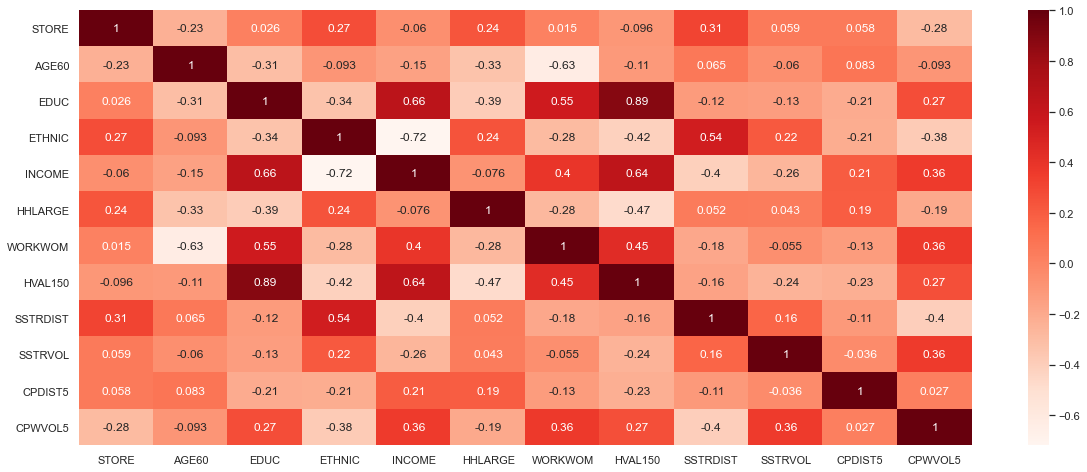

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(data_store.corr(), annot=True, cmap = 'Reds')
plt.show()

### Merging Both Datasets - Store demo and store sales


In [49]:
final_data = pd.merge(data_store,group_set, how='left', left_on='STORE',right_on='store')
final_data.head()

,STORE,AGE60,EDUC,ETHNIC,INCOME,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,...,price5,price6,price7,price8,price9,price10,price11,profit,Units_sold,profit_per_store
0,2,0.232865,0.248935,0.114280,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,...,0.036280,0.044283,0.038117,0.035442,0.033469,0.027989,0.030892,31.080161,7669.236364,238361.10
1,5,0.117368,0.321226,0.053875,10.922371,0.103092,0.410568,0.535883,3.801998,0.681818,...,0.035644,0.042774,0.036837,0.034797,0.032104,0.027089,0.028106,28.597027,8905.554859,254672.39
2,8,0.252394,0.095173,0.035243,10.597010,0.131750,0.283075,0.054227,2.636333,1.500000,...,0.033309,0.038724,0.034083,0.031590,0.031692,0.026005,0.027002,24.133076,13290.724191,320746.06
3,9,0.269119,0.222172,0.032619,10.787152,0.096830,0.358995,0.505747,1.103279,0.666667,...,0.034611,0.041640,0.036043,0.033888,0.031579,0.026599,0.028101,27.154972,9321.821290,253133.79
4,12,0.178341,0.253413,0.380698,9.996659,0.057212,0.390942,0.386628,9.198734,1.111111,...,0.036860,0.044676,0.038571,0.035811,0.034842,0.028779,0.028882,30.837382,13044.515415,402258.70


In [50]:
final_data_group = final_data.groupby('STORE').sum().reset_index().sort_values('profit_per_store',ascending=False)
final_data_group.head()

,STORE,AGE60,EDUC,ETHNIC,INCOME,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,...,price5,price6,price7,price8,price9,price10,price11,profit,Units_sold,profit_per_store
62,111,0.210513,0.096929,0.995691,10.138283,0.157136,0.288515,0.012747,12.190945,1.894737,...,0.036319,0.044475,0.038181,0.035716,0.034293,0.028708,0.031257,31.141903,18023.684848,561291.85
82,137,0.209602,0.528362,0.113250,10.966490,0.092996,0.330293,0.860739,6.026484,0.705882,...,0.035065,0.043085,0.036988,0.034944,0.032518,0.027465,0.029721,31.157022,15281.543599,476127.39
78,130,0.145117,0.143407,0.984896,9.966650,0.111082,0.337030,0.080565,17.855951,1.636364,...,0.035687,0.044320,0.037989,0.035750,0.034400,0.028546,0.031013,31.008189,15343.872408,475785.69
76,128,0.157485,0.211897,0.355911,10.153429,0.100043,0.398251,0.266187,10.667447,2.000000,...,0.036274,0.044402,0.038190,0.035361,0.034417,0.028209,0.031343,30.941453,15213.640947,470732.16
73,123,0.176041,0.153191,0.204810,10.334100,0.145040,0.311573,0.228675,7.449994,1.111111,...,0.036502,0.044483,0.038076,0.035375,0.034187,0.028781,0.031192,31.145397,13520.824242,421111.44


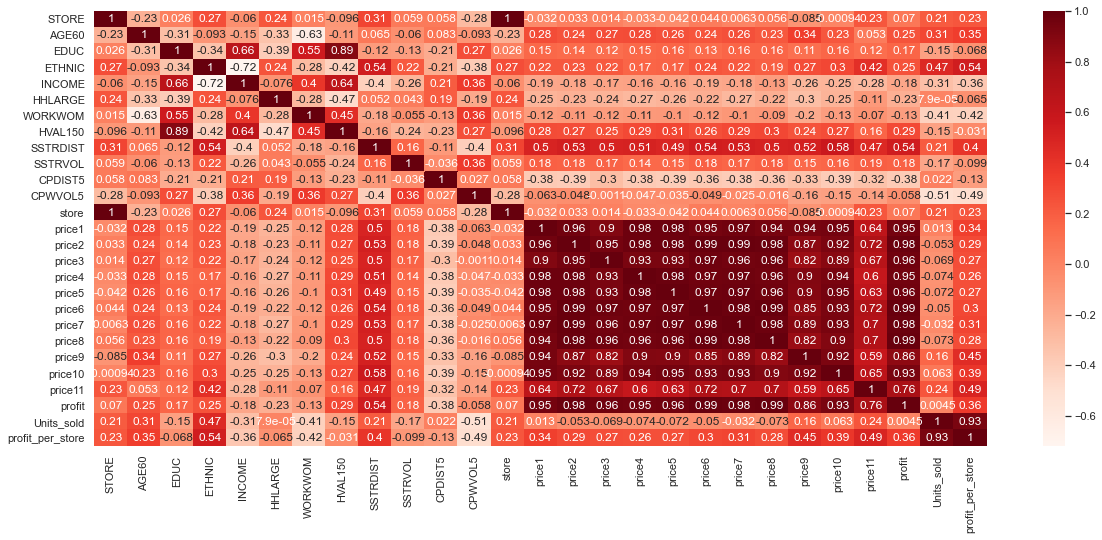

In [51]:
plt.figure(figsize=(20,8))
sns.heatmap(final_data_group.corr(), annot=True, cmap = 'Reds')
plt.show()

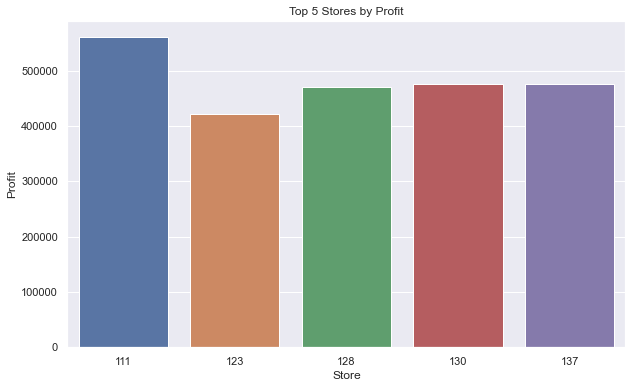

In [52]:
# Top 5 stores based on profit
top_profit_stores = final_data_group.nlargest(5, 'profit_per_store').sort_values('profit_per_store',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_profit_stores, x='STORE', y='profit_per_store')
plt.title('Top 5 Stores by Profit')
plt.xlabel('Store')
plt.ylabel('Profit')
plt.show()

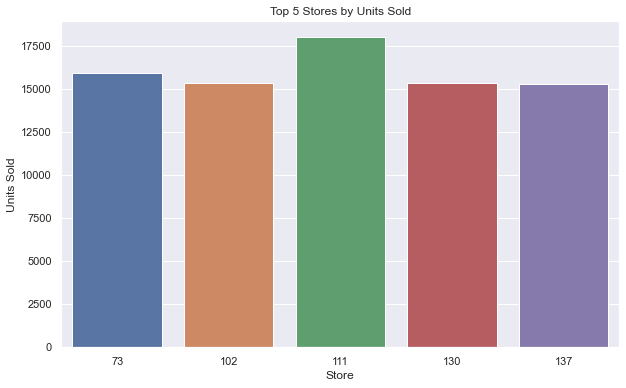

In [53]:
# Top 5 stores based on units sold
top_units_sold_stores = final_data_group.nlargest(5, 'Units_sold').sort_values('Units_sold',ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_units_sold_stores, x='STORE', y='Units_sold')
plt.title('Top 5 Stores by Units Sold')
plt.xlabel('Store')
plt.ylabel('Units Sold')
plt.show()

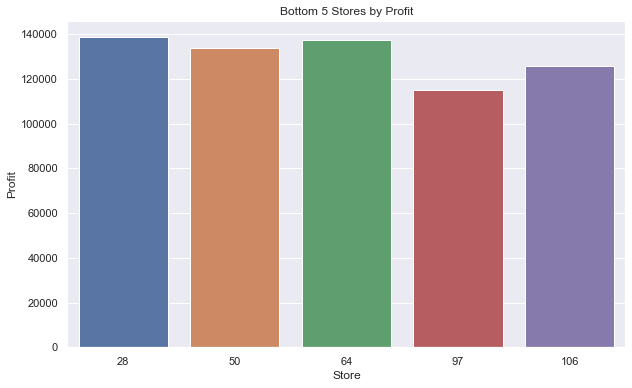

In [54]:
# Bottom 5 stores based on profit
bottom_profit_stores = final_data_group.nsmallest(5, 'profit_per_store').sort_values('profit_per_store')
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_profit_stores, x='STORE', y='profit_per_store')
plt.title('Bottom 5 Stores by Profit')
plt.xlabel('Store')
plt.ylabel('Profit')
plt.show()

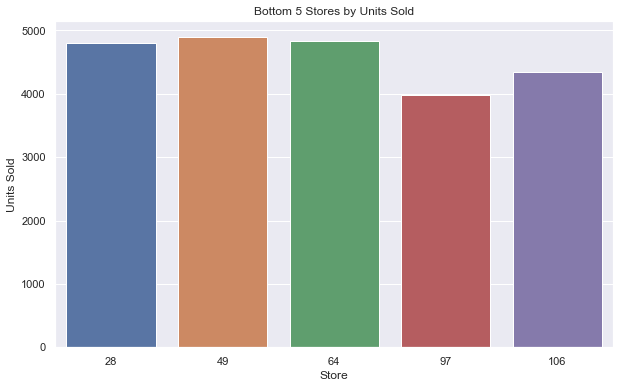

In [55]:
# Bottom 5 stores based on units sold
bottom_units_sold_stores = final_data_group.nsmallest(5, 'Units_sold')
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_units_sold_stores, x='STORE', y='Units_sold')
plt.title('Bottom 5 Stores by Units Sold')
plt.xlabel('Store')
plt.ylabel('Units Sold')
plt.show()

## WEEK WISE ANALYSIS OF SALES AND PROFIT

In [56]:
# Analysing profits and untis sold per week per store
week_group_data = data_sales.groupby(['week','store']).mean().sort_values('Units_sold')
week_group_data.head()

brand   logmove  constant    price1    price2    price3    price4  \
week store                                                                      
149  97       6.0  7.020491       1.0  0.046719  0.049479  0.046719  0.045156   
     106      6.0  7.371611       1.0  0.046719  0.049479  0.046719  0.045156   
     64       6.0  7.675681       1.0  0.046719  0.049479  0.044531  0.045156   
157  106      6.0  6.878580       1.0  0.038906  0.055625  0.050000  0.045156   
43   49       6.0  7.669272       1.0  0.057187  0.060312  0.049219  0.044375   

              price5    price6    price7    price8    price9   price10  \
week store                                                               
149  97     0.042031  0.045729  0.040469  0.038906  0.027969  0.031094   
     106    0.042031  0.045729  0.040469  0.038906  0.027969  0.031094   
     64     0.042031  0.045729  0.040469  0.038906  0.027969  0.030156   
157  106    0.031094  0.050000  0.043281  0.038906  0.040000  0.035000   
43   49     0.046719  0.050104  0.031094  0.038750  0.045469  0.038906   

             price11      deal      feat     profit   Units_sold  
week store                                                        
149  97     0.023359  0.181818  0.090909  29.329399  1376.000000  
     106    0.023359  0.181818  0.090909  29.005544  2170.181818  
     64     0.029609  0.090909  0.090909  30.795344  2408.727273  
157  106    0.028047  0.181818  0.090909  41.589387  2452.363636  
43   49     0.035078  0.272727  0.181818  31.185668  2455.272727

In [57]:
week_group_data_analysis = data_sales[['week','store','brand','profit','Units_sold']]
week_group_data_analysis = week_group_data_analysis.astype({'week': str, 'store': str, 'brand': str})
week_group_data_analysis.head()

,week,store,brand,profit,Units_sold
0,40,2,1,37.992326,8256.0
1,46,2,1,30.126667,6144.0
2,47,2,1,30.000000,3840.0
3,48,2,1,29.950000,8000.0
4,50,2,1,29.920000,8896.0


In [58]:
# Group By week
week_group = week_group_data_analysis.groupby('week')[['profit','Units_sold']].sum().reset_index().sort_values('Units_sold')
week_group.head()

,week,profit,Units_sold
49,149,25908.224662,4734112.0
68,47,23824.490286,4904160.0
66,45,25128.489210,4948352.0
65,44,26905.137711,4993664.0
64,43,24721.683251,5287616.0


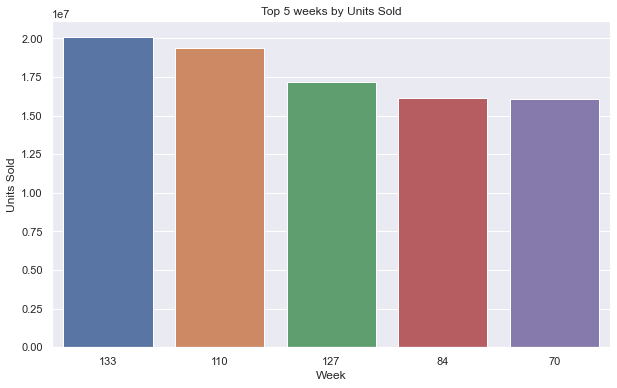

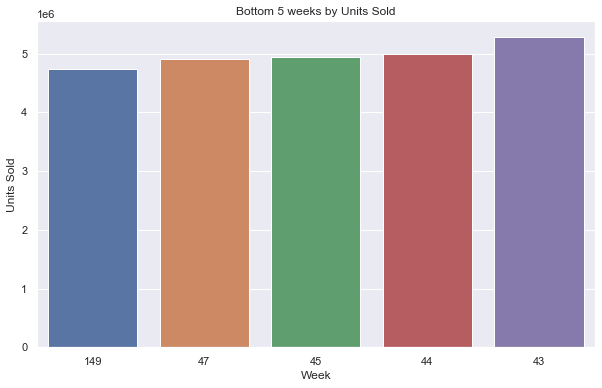

In [63]:
#Top 5 and bottom 5 weeks by sales/profit and units sold
top_week = week_group.nlargest(5, 'Units_sold')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_week, x='week', y='Units_sold')
plt.title('Top 5 weeks by Units Sold')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.show()

bottom_Week = week_group.nsmallest(5, 'Units_sold')
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_Week, x='week', y='Units_sold')
plt.title('Bottom 5 weeks by Units Sold')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.show()

#### Brand analysis

In [60]:
brand_group_analysis = data_sales[['week','store','brand','profit','Units_sold']]
brand_group_analysis = brand_group_analysis.astype({'week': str, 'store': str, 'brand': str})
brand_group = week_group_data_analysis.groupby('brand')[['profit','Units_sold']].sum().reset_index().sort_values('Units_sold')
brand_group.head()


,brand,profit,Units_sold
9,8,293872.230000,26176576.0
4,3,310500.717369,31326208.0
10,9,267132.940000,32756480.0
7,6,253448.448923,43200192.0
8,7,234105.231015,53116800.0


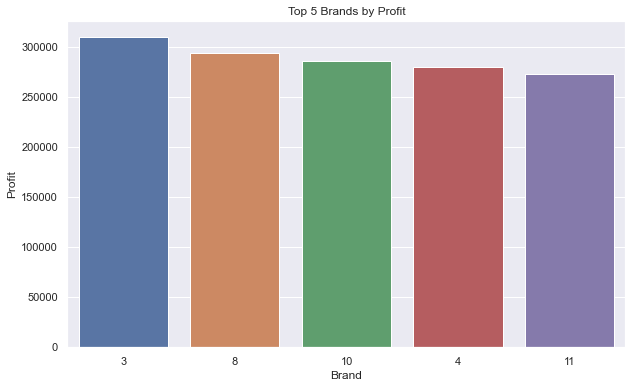

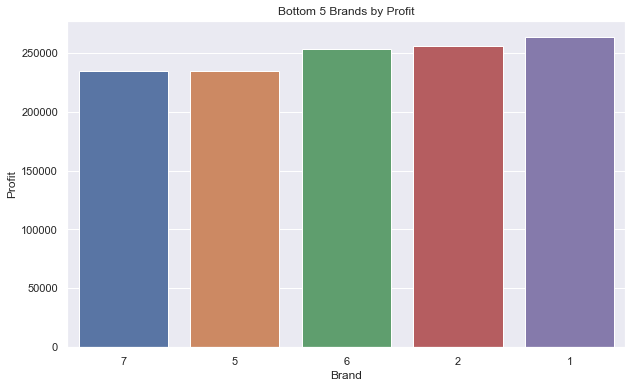

In [62]:
#Top 5 and bottom 5 brands by sales/profit
top_brand = brand_group.nlargest(5, 'profit')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brand, x='brand', y='profit')
plt.title('Top 5 Brands by Profit')
plt.xlabel('Brand')
plt.ylabel('Profit')
plt.show()

bottom_brand = brand_group.nsmallest(5, 'profit')
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_brand, x='brand', y='profit')
plt.title('Bottom 5 Brands by Profit')
plt.xlabel('Brand')
plt.ylabel('Profit')
plt.show()

#### ANALYSIS ENDS HERE ------- FILE ENDS HERE